In [1]:
#Import data

In [100]:
import pandas as pd

df= pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
#Add an overweight column to the data. To determine if a person is overweight, 
#first calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
#If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [103]:
df['overweight']= df['weight'] / ( (df['height']/100) ** 2 )

df['overweight']=(df.loc[:,'overweight']>25).astype(int)
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [104]:
#Normalize data by making 0 always good and 1 always bad. 
#If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [105]:
df['cholesterol']

0        1
1        3
2        3
3        1
4        1
        ..
69995    1
69996    2
69997    3
69998    1
69999    2
Name: cholesterol, Length: 70000, dtype: int64

In [106]:
df['cholesterol']=(df['cholesterol'] - df['cholesterol'].mean())/df['cholesterol'].std()
df['cholesterol']

0       -0.539318
1        2.400776
2        2.400776
3       -0.539318
4       -0.539318
           ...   
69995   -0.539318
69996    0.930729
69997    2.400776
69998   -0.539318
69999    0.930729
Name: cholesterol, Length: 70000, dtype: float64

In [107]:
df['cholesterol']= (df.loc[:,'cholesterol'] > 1).astype(int)
df['cholesterol']

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    0
69997    1
69998    0
69999    0
Name: cholesterol, Length: 70000, dtype: int64

In [108]:
df['gluc']=(df['gluc'] - df['gluc'].mean())/df['gluc'].std()
df['gluc']= (df.loc[:,'gluc'] > 1).astype(int)
df['gluc']


0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int64

In [109]:
#Draw the Categorical Plot in the draw_cat_plot function.

def draw_cat_plot(data):
    plt.plot(data, c='red', linestyle='--')
    return plt.plot


In [ ]:
#Create a DataFrame for the cat plot using pd.melt with values from
#cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
#Group and reformat the data in df_cat to split it by cardio. 

In [125]:
df_cat = pd.melt(df,
                id_vars=['cardio'],
                value_vars=['cholesterol','gluc', 'smoke', 'alco', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
349995,0,overweight,1
349996,1,overweight,1
349997,1,overweight,1
349998,1,overweight,1


In [ ]:

#Show the counts of each feature. 
#You will have to rename one of the columns for the catplot to work correctly.

In [126]:
df_cat.value_counts()

cardio  variable     value
1       alco         0        33156
0       cholesterol  0        33129
        alco         0        33080
1       smoke        0        32050
0       smoke        0        31781
        gluc         0        30894
1       cholesterol  0        28805
        gluc         0        28585
        overweight   1        24440
0       overweight   1        19106
                     0        15915
1       overweight   0        10539
        gluc         1         6394
        cholesterol  1         6174
0       gluc         1         4127
        smoke        1         3240
1       smoke        1         2929
0       alco         1         1941
        cholesterol  1         1892
1       alco         1         1823
Name: count, dtype: int64

In [ ]:
#Convert the data into long format and create a chart 
#that shows the value counts of the categorical features 
#using the following method provided by the seaborn library import: sns.catplot().

In [131]:
long_format = df_cat.value_counts().reset_index(name='total')
long_format

,cardio,variable,value,total
0,1,alco,0,33156
1,0,cholesterol,0,33129
2,0,alco,0,33080
3,1,smoke,0,32050
4,0,smoke,0,31781
5,0,gluc,0,30894
6,1,cholesterol,0,28805
7,1,gluc,0,28585
8,1,overweight,1,24440
9,0,overweight,1,19106


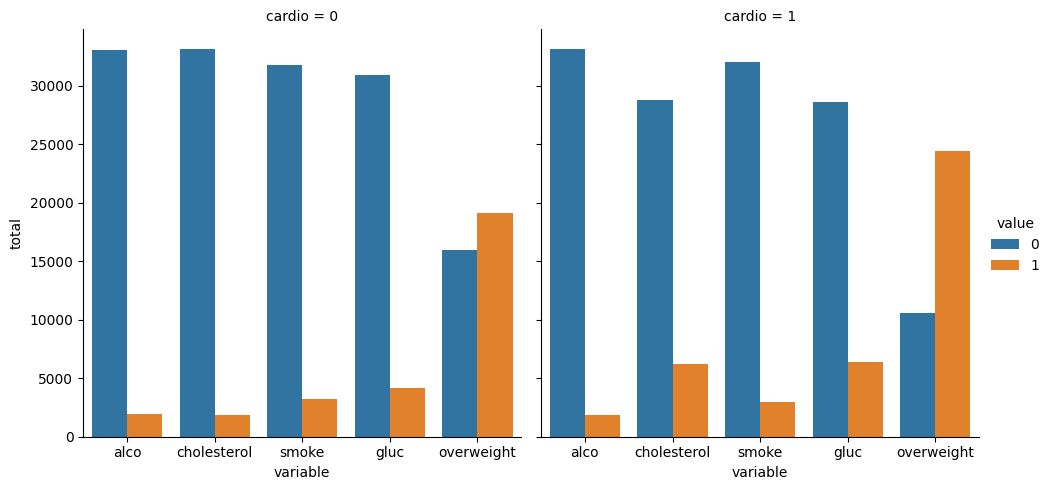

In [150]:
import seaborn as sns
figure1=sns.catplot(
    x='variable',
    y='total',
    hue='value',
    col='cardio',
    data=long_format,
    kind='bar'
).fig

In [151]:
figure1.savefig("Figure1.pdf")

In [ ]:
#Draw the Heat Map in the draw_heat_map function.

In [161]:
def draw_heat_map(data):
    plt.figure(figsize=(6,5))
    sns.heatmap(data, annot=True, cmap="coolwarm")
    return plt.show()

In [186]:
df_heat = df[df['ap_lo'] <= df['ap_hi']]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [187]:
df_heat=df_heat[df_heat['height'] >= df_heat['height'].quantile(0.025)]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [188]:
df_heat=df_heat[df_heat['height'] <= df_heat['height'].quantile(0.975)]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [189]:
df_heat=df_heat[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [190]:
df_heat=df_heat[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


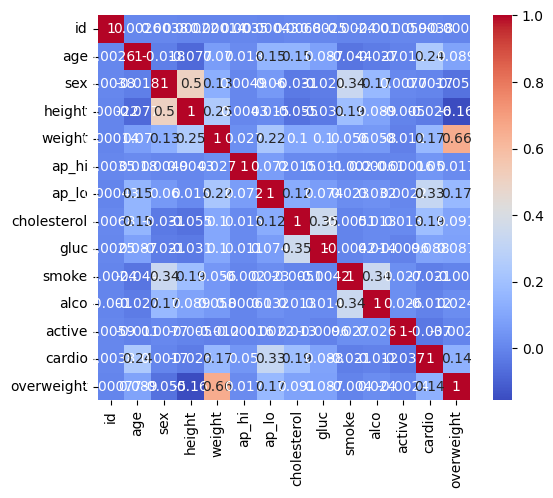

In [191]:
#Calculate the correlation matrix and store it in the corr variable.
corr = df_heat.corr()
draw_heat_map(corr)

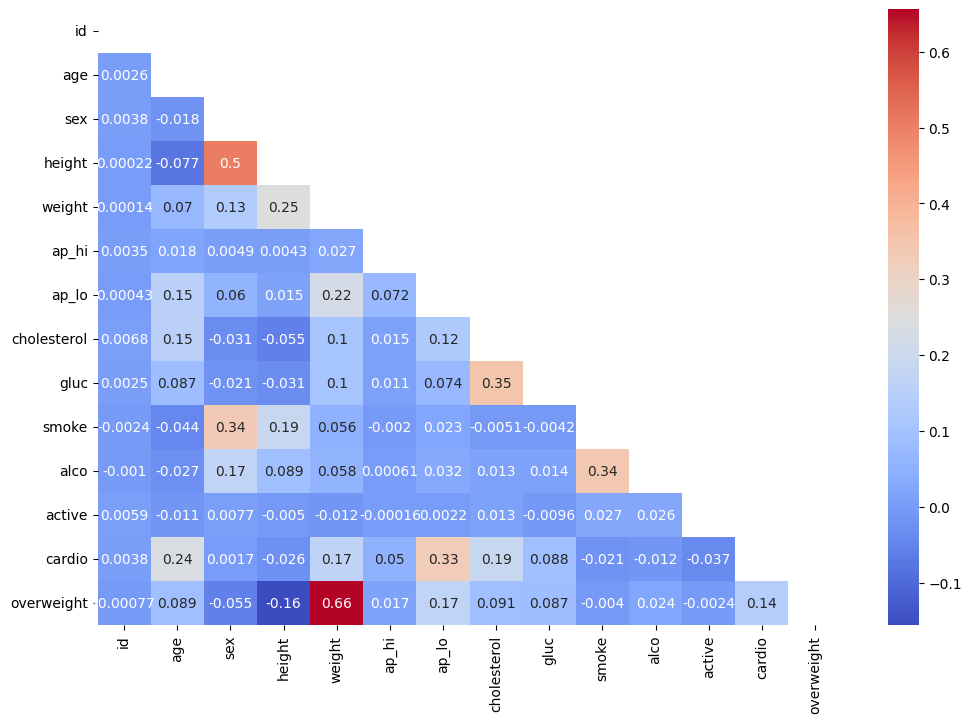

In [203]:
#Generate a mask for the upper triangle and store it in the mask variable.

import numpy as np

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", ax=ax)
plt.show()
